22.0 , 8714.0
4505.785909712722
1933.5717017071743
(584, 11)


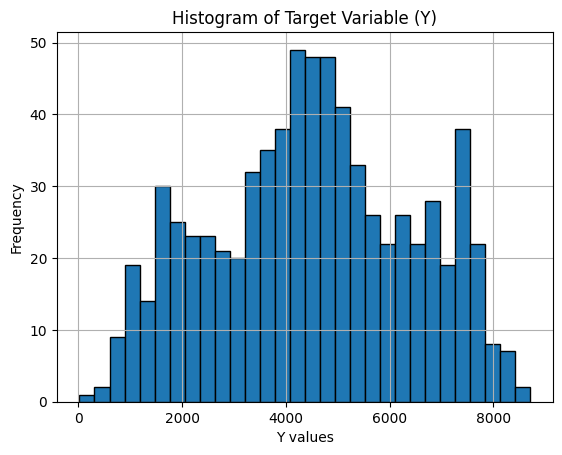

703    6606.0
33     1550.0
300    3747.0
456    6041.0
633    7538.0
        ...  
70     2132.0
192    4258.0
328    2792.0
165    5180.0
135    3958.0
Name: cnt, Length: 147, dtype: float64


In [19]:
# CMPS 262 - Data Science
# Assignment 3 - Model Fitting & Improvement
# By - Ralph Mouawad, Alice Karadjian & Lea Bou Sleiman
# To - Dr. Fatima Abu Salem

import pandas as pd
from sklearn.model_selection import RepeatedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# divide between input and output and split the data
data = pd.read_csv("imputed_dataset.csv")
data = data.drop(['dteday', 'instant'], axis = 1) # we don't need them
x = data.drop('cnt', axis = 1) # features
y = data['cnt'] # output which is number of bikes rented (total)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.2, random_state = 42) # normal splitting
data.head()

# hyperparameters for each model
params = {
    'decision_tree': {
        'decisiontreeregressor__max_depth': [200, 330, 600],
        'decisiontreeregressor__min_samples_split': [5, 8, 12],
        'decisiontreeregressor__min_samples_leaf': [2,4,6]
    },
    'random_forest': {
        'randomforestregressor__n_estimators': [50, 55],
        'randomforestregressor__max_depth': [25, 30, 35],
        'randomforestregressor__min_samples_split': [2, 3, 4],
        'randomforestregressor__min_samples_leaf': [2, 3, 4]
    },
}


# Regression Metrics to evaluate the performance of our model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def compute_metrics_reg(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print('R^2:  {:.5f}'.format(r2))
    print('RMSE: {:.5f}'.format(rmse))
    print('MSE:  {:.5f}'.format(mse))
    print('MAE:  {:.5f}'.format(mae))

# Cross Validation
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

def replace_params(params):
    params_new = {}
    for k, v in params.items():
        k_new = k.split('__')[-1]
        params_new[k_new] = v
    return params_new

print(min(y),',', max(y))
print(sum(y)/len(y)) # mean number of bikes rented
print(np.std(y))
print(Xtrain.shape)

data['cnt'].hist(bins=30, edgecolor='black')
plt.title('Histogram of Target Variable (Y)')
plt.xlabel('Y values')
plt.ylabel('Frequency')
plt.show()

print(Ytest)




R^2:  0.82765
RMSE: 832.07938
MSE:  692356.09389
MAE:  619.92246
the slope is 0.8167003823050685
Pearson's correlation: 0.9099

Coefficients:
season: 525.8016
yr: 2026.8505
mnth: -39.4844
holiday: -404.6873
weekday: 74.1871
workingday: 161.9908
weathersit: -625.3008
temp: 2111.0230
atemp: 3459.9844
hum: -831.7712
windspeed: -2113.4059

Intercept: 1227.0738


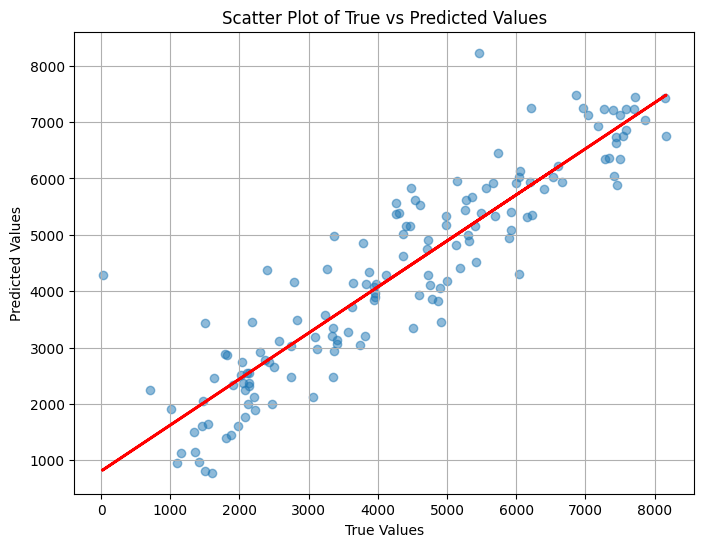

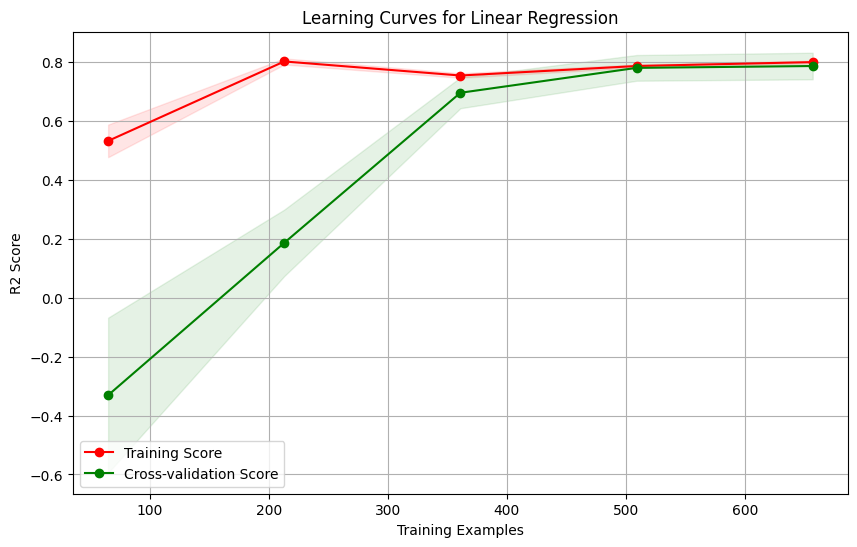

In [47]:
# Fitting Linear Regresssion
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, r2_score

#Linear Regression model
model = LinearRegression()
rmse_scorer = make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred)), greater_is_better=False)
cv_scores = cross_val_score(model, x, y, cv=cv, scoring=rmse_scorer)
r2_scorer = make_scorer(r2_score)

model.fit(Xtrain, Ytrain)
y_pred1 = model.predict(Xtest)

compute_metrics_reg(Ytest, y_pred1)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Ytest, y_pred1, alpha=0.5)
plt.title('Scatter Plot of True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)

slope, intercept = np.polyfit(Ytest, y_pred1, 1)
print('the slope is', slope)
plt.plot(Ytest, slope * Ytest + intercept, color='red', linewidth=2, label=f'Slope: {slope:.2f}')

# Pearson's correlation
correlation, _ = pearsonr(Ytest, y_pred1)
print(f"Pearson's correlation: {correlation:.4f}")

# Get Coefficients
coefficients = model.coef_
intercept = model.intercept_

print('\nCoefficients:')
for feature, coef in zip(x.columns, coefficients):
    print(f'{feature}: {coef:.4f}')

print(f'\nIntercept: {intercept:.4f}')

plt.show()

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, x, y, cv=cv, scoring=r2_scorer, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation for training and test sets
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")

plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.title('Learning Curves for Linear Regression')
plt.xlabel('Training Examples')
plt.ylabel('R2 Score')
plt.legend(loc="best")
plt.grid(True)
plt.show()


In [50]:
# Fitting Regression Trees
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RepeatedKFold

model = DecisionTreeRegressor()
model.fit(Xtrain, Ytrain)
y_pred2 = model.predict(Xtest) # basic implementation

# Improving the model by finding the best set of hyperparameters
model_dt = make_pipeline(DecisionTreeRegressor())
scoring_metric = 'neg_root_mean_squared_error'
clf_dt = GridSearchCV(estimator=model_dt, param_grid=params['decision_tree'],scoring = scoring_metric, cv=cv)
clf_dt.fit(Xtrain, Ytrain)

best_dt = replace_params(clf_dt.best_params_)
model_dt = DecisionTreeRegressor(**best_dt)
model_dt.fit(Xtrain, Ytrain)
y_pred2 = model_dt.predict(Xtest)

# Get feature importances
feature_importances = model_dt.feature_importances_

# Display feature importances
for feature, importance in zip(Xtrain.columns, feature_importances):
    print(f"{feature}: {importance}")

cv_results = clf_dt.cv_results_
mean_scores = cv_results['mean_test_score']
std_scores = cv_results['std_test_score']

print("\nTuned Model Metrics:")
compute_metrics_reg(Ytest, model_dt.predict(Xtest))

# Display the best hyperparameters
print("\nBest Hyperparameters:")
print(clf_dt.best_params_)

# Display the mean and standard deviation of cross-validated scores
#print("\nCross-validated Scores:")
#for mean_score, std_score, params in zip(mean_scores, std_scores, cv_results['params']):
 #   print(f"Parameters: {params}, Mean Score: {mean_score:.4f}, Std Dev: {std_score:.4f}")

# Display the standard deviation of the averaged scores
print("\nStandard Deviation of Averaged Scores:", np.std(mean_scores))

plt.figure(figsize=(8, 6))
plt.scatter(Ytest, y_pred2, alpha=0.5)
plt.title('Scatter Plot of True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)

slope, intercept = np.polyfit(Ytest, y_pred2, 1)
print('the slope is', slope)
plt.plot(Ytest, slope * Ytest + intercept, color='red', linewidth=2, label=f'Slope: {slope:.2f}')

correlation, _ = pearsonr(Ytest, y_pred2)

print(f"Pearson's correlation: {correlation:.4f}")


plt.show()


season: 0.05614842128856548
yr: 0.32357549203582747
mnth: 0.018616142916399417
holiday: 0.0
weekday: 0.007428228575751874
workingday: 0.0011273791104784326
weathersit: 0.01880658867534575
temp: 0.43730012581434025
atemp: 0.06197183473188558
hum: 0.04886246660900268
windspeed: 0.02616332024240318


In [51]:
# Ensemble Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(Xtrain, Ytrain)
y_pred3 = model.predict(Xtest) # basic implementation

# Improving the model by finding the best set of hyperparameters
model_rf = make_pipeline(RandomForestRegressor())
scoring_metric = 'neg_root_mean_squared_error'
clf_rf = GridSearchCV(estimator=model_rf, param_grid=params['random_forest'], scoring = scoring_metric, cv=cv)
clf_rf.fit(Xtrain, Ytrain)

best_rf = replace_params(clf_rf.best_params_)
model_rf = RandomForestRegressor(**best_rf)
model_rf.fit(Xtrain, Ytrain)
y_pred3 = model_rf.predict(Xtest)

compute_metrics_reg(Ytest, y_pred3)

# Get feature importances
feature_importances = model_rf.feature_importances_
features = Xtrain.columns

# Display feature importances
print("\nFeature Importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.4f}")

cv_results = clf_rf.cv_results_
mean_scores = cv_results['mean_test_score']
std_scores = cv_results['std_test_score']
print("\nTuned Model Metrics:")
compute_metrics_reg(Ytest, model_rf.predict(Xtest))

# Display the best hyperparameters
print("\nBest Hyperparameters:")
print(clf_rf.best_params_)
# Display the standard deviation of the averaged scores
print("\nStandard Deviation of Averaged Scores:", np.std(mean_scores))

plt.figure(figsize=(8, 6))
plt.scatter(Ytest, y_pred3, alpha=0.5)
plt.title('Scatter Plot of True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)

slope, intercept = np.polyfit(Ytest, y_pred3, 1)
print('the slope is', slope)
plt.plot(Ytest, slope * Ytest + intercept, color='red', linewidth=2, label=f'Slope: {slope:.2f}')

correlation, _ = pearsonr(Ytest, y_pred3)

print(f"Pearson's correlation: {correlation:.4f}")




Feature Importances:
season: 0.0497
yr: 0.2815
mnth: 0.0309
holiday: 0.0010
weekday: 0.0163
workingday: 0.0048
weathersit: 0.0158
temp: 0.3678
atemp: 0.1440
hum: 0.0580
windspeed: 0.0303


Epoch 1/400
15/15 [==============================] - 2s 33ms/step - loss: 24870022.0000 - mse: 24870022.0000 - val_loss: 22214640.0000 - val_mse: 22214640.0000
Epoch 2/400
15/15 [==============================] - 0s 11ms/step - loss: 23993430.0000 - mse: 23993430.0000 - val_loss: 20650326.0000 - val_mse: 20650326.0000
Epoch 3/400
15/15 [==============================] - 0s 11ms/step - loss: 21188512.0000 - mse: 21188512.0000 - val_loss: 16782124.0000 - val_mse: 16782124.0000
Epoch 4/400
15/15 [==============================] - 0s 11ms/step - loss: 15662169.0000 - mse: 15662169.0000 - val_loss: 10757547.0000 - val_mse: 10757547.0000
Epoch 5/400
15/15 [==============================] - 0s 11ms/step - loss: 8902515.0000 - mse: 8902515.0000 - val_loss: 5391098.5000 - val_mse: 5391098.5000
Epoch 6/400
15/15 [==============================] - 0s 19ms/step - loss: 4419340.0000 - mse: 4419340.0000 - val_loss: 3602927.0000 - val_mse: 3602927.0000
Epoch 7/400
15/15 [=============================

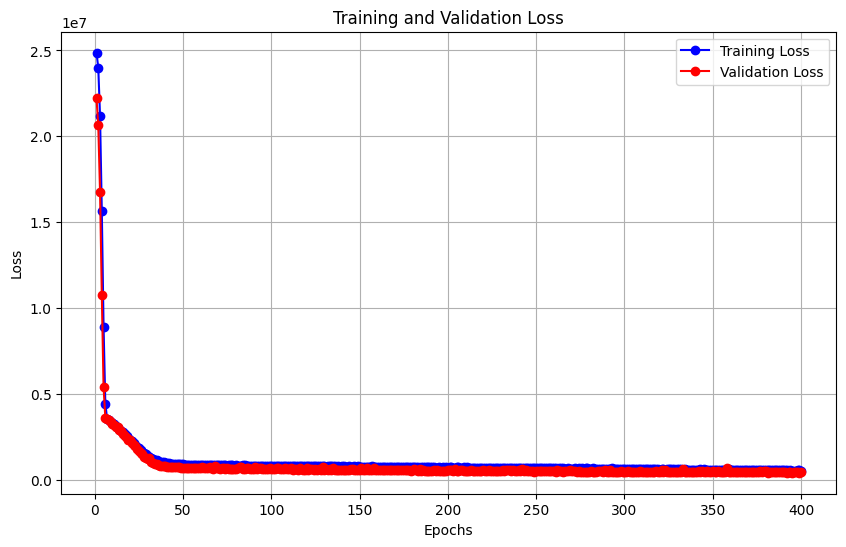

5/5 [==============================] - 0s 4ms/step
r2:   0.85711
rmse: 757.63726
mse:  574014.22457
mae:  565.23730
the slope is [0.81780772]
Pearson's correlation: 0.9282


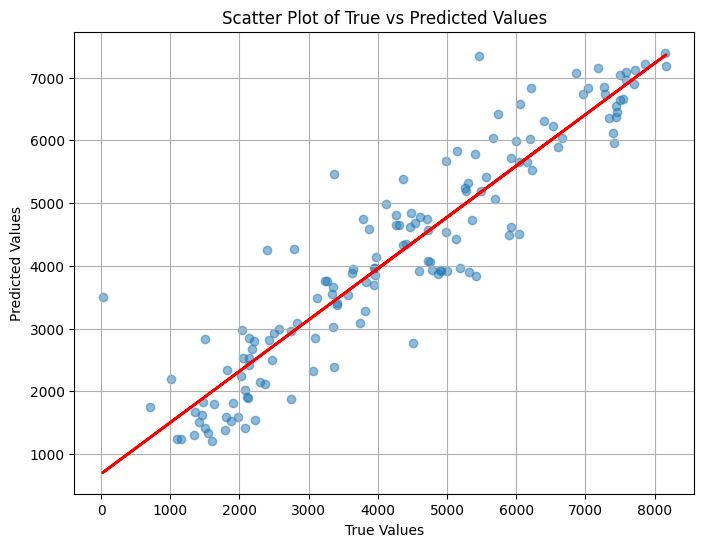

In [53]:
# Basic Feed Forward Neural Network

import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import SGD # the stochastic gradient descent algorithm for optimization
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop


model = Sequential()
model.add(Dense(128, input_shape = (11,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, 'linear'))

lr = 0.001
rmsprop = RMSprop(learning_rate=lr)
model.compile(optimizer = rmsprop, loss = 'mean_squared_error', metrics = ['mse']) # for regression problems, mean squared error (MSE) is often employed, but I will compute RMSE
model_copy = model # save initial model for learning curve (check cell below)
history = model.fit(Xtrain, Ytrain, batch_size = 32,  validation_split=0.2, epochs = 400, verbose = 1) # we took a batch size of 32 samples to compute gradient in the SGD to make it faster and better for the testing data
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


y_pred4 = model.predict(Xtest)
print('r2:   {:.5f}'.format(r2_score(Ytest, y_pred4)))
print('rmse: {:.5f}'.format(np.sqrt(mean_squared_error(Ytest, y_pred4))))
print('mse:  {:.5f}'.format(mean_squared_error(Ytest, y_pred4)))
print('mae:  {:.5f}'.format(mean_absolute_error(Ytest, y_pred4)))


plt.figure(figsize=(8, 6))
plt.scatter(Ytest, y_pred4, alpha=0.5)
plt.title('Scatter Plot of True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)

slope, intercept = np.polyfit(Ytest, y_pred4, 1)
print('the slope is', slope)
plt.plot(Ytest, slope * Ytest + intercept, color='red', linewidth=2)

#print(y_pred4)
#print(Ytest)
#print(Ytest.shape, y_pred4.shape)

correlation = np.corrcoef(Ytest.values, y_pred4.flatten())[0, 1] # I used a different code for the correlation because it was giving an error
print(f"Pearson's correlation: {correlation:.4f}")


5/5 [==============================] - 0s 5ms/step


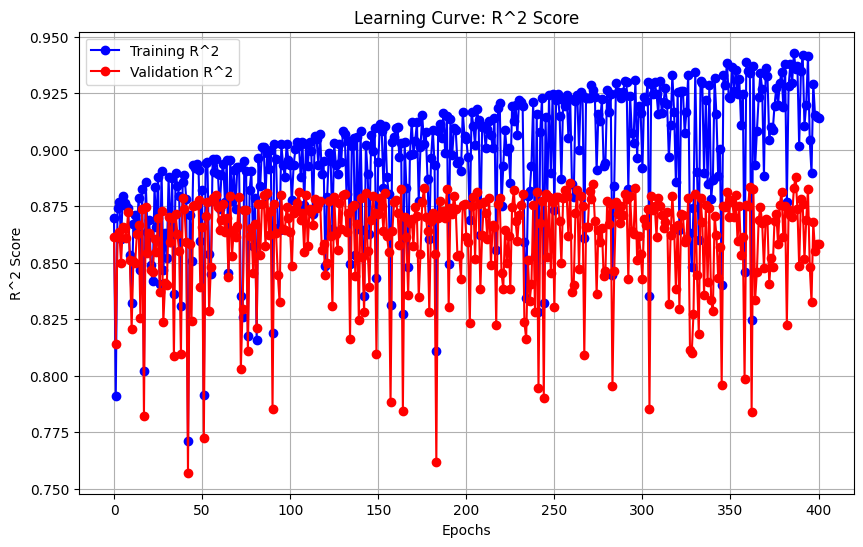

In [46]:
## Learning Curve - The code isnt very time friendly but we did this because we didnt do NN with grid search
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Function to calculate R^2 score for predictions
def r2_metric(y_true, y_pred):
    return r2_score(y_true, y_pred)
# Calculate R^2 scores for training and validation
train_r2_scores = [r2_metric(Ytrain, model.predict(Xtrain))]
val_r2_scores = [r2_metric(Ytest, model.predict(Xtest))]

# Collect R^2 scores for each epoch
for epoch in range(1, 400 + 1):
    model_copy.fit(Xtrain, Ytrain, batch_size=32, epochs=1, verbose=0)
    train_r2_scores.append(r2_metric(Ytrain, model_copy.predict(Xtrain)))
    val_r2_scores.append(r2_metric(Ytest, model_copy.predict(Xtest)))

# Plot the learning curve for R^2 score
plt.figure(figsize=(10, 6))
epochs = range(0, 401)
plt.plot(epochs, train_r2_scores, 'bo-', label='Training R^2')
plt.plot(epochs, val_r2_scores, 'ro-', label='Validation R^2')
plt.title('Learning Curve: R^2 Score')
plt.xlabel('Epochs')
plt.ylabel('R^2 Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
'''
import keras                                # the code here didn't run bcz of some problems with keras so we took the results of the previous code to continue the homework.
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from keras.wrappers.scikit_learn import KerasRegressor

# Function to create a Keras model
def create_model(num_layers=1, num_neurons=64, lr=0.001):
    model = Sequential()
    model.add(Dense(256, input_shape=(11,), activation='relu'))

    for _ in range(num_layers):
        model.add(Dense(num_neurons, activation='relu'))

    model.add(Dense(1, 'linear'))

    rmsprop = RMSprop(learning_rate=lr)
    model.compile(optimizer=rmsprop, loss='mean_squared_error', metrics=['mse'])
    return model

# Create KerasRegressor for GridSearchCV
keras_regressor = KerasRegressor(build_fn=create_model, epochs=400, batch_size=32, verbose=0)

# Define parameter grid for grid search
param_grid = {
    'num_layers': [1, 2, 3],
    'num_neurons': [32, 64, 128],
    'lr': [0.001, 0.01, 0.1],
    'batch_size': [32, 64]
}

# Define scoring metric (you can choose any metric you want to optimize)
scoring_metric = make_scorer(mean_squared_error, greater_is_better=False)

# Perform grid search
grid_search = GridSearchCV(estimator=keras_regressor, param_grid=param_grid, scoring=scoring_metric, cv=3)
grid_result = grid_search.fit(Xtrain, Ytrain)

# Print best parameters
print("Best Parameters:", grid_result.best_params_)

# Get the best model
best_model = grid_result.best_estimator_.model

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(best_model.history.history['loss'], 'bo-', label='Training Loss')
plt.plot(best_model.history.history['val_loss'], 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions with the best model
y_pred = grid_result.predict(Xtest)

# Evaluate the best model
print('r2:   {:.5f}'.format(r2_score(Ytest, y_pred)))
print('rmse: {:.5f}'.format(np.sqrt(mean_squared_error(Ytest, y_pred))))
print('mse:  {:.5f}'.format(mean_squared_error(Ytest, y_pred)))
print('mae:  {:.5f}'.format(mean_absolute_error(Ytest, y_pred)))







<ipython-input-77-c7264b12b0f9>:27: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_regressor = KerasRegressor(build_fn=create_model, epochs=400, batch_size=32, verbose=0)


ValueError: ignored

In [15]:
# Learning Curves

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None,
                        train_sizes=np.linspace(0.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 1)

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("r2")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y,
        cv=cv,
        scoring='r2',  # Realize the scoring here
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

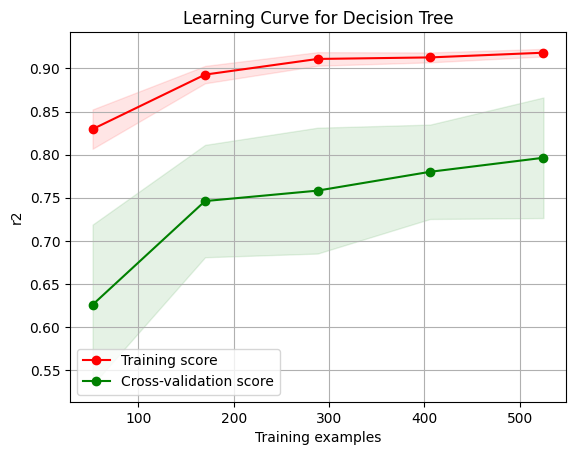

In [21]:
# Learning Curve for Decision Tree

pipeline = make_pipeline(DecisionTreeRegressor(**best_dt))
plot_learning_curve(pipeline, "Learning Curve for Decision Tree", X=Xtrain, y=Ytrain, cv=cv)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

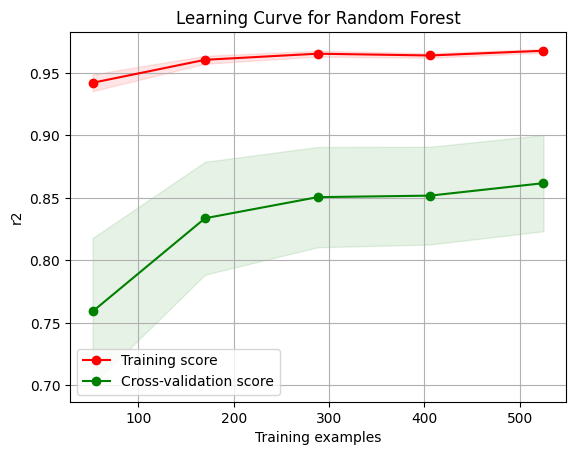

In [23]:
# Learning Curve for Random Forest

pipeline = make_pipeline(RandomForestRegressor(**best_rf))
plot_learning_curve(pipeline, "Learning Curve for Random Forest", X=Xtrain, y=Ytrain, cv=cv)